### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025
# **Tarea Semanal 6**: *Respuesta en frecuencia de Filtros Pasivos RLC*
#### Mora Taranilla y Victoria Jazmín Salgado

## **Resumen**: 
El objetivo de esta tarea semanal fue comenzar a trabajar con los conceptos de filtros analógicos. En el presente trabajo se analizan e implementan secciones bicuadráticas a partir de funciones de transferencia de segundo orden. Se determinan los parámetros característicos de cada red y se representan los correspondientes diagramas de polos y ceros, junto con las respuestas en frecuencia de módulo y fase. 

## **Introducción**
El objeto de estudio de este trabajo serán algunos casos de **Filtros Analógicos Pasivos**. 

Un filtro analógico es un circuito de componentes electrónicos, como resistores, capacitores e inductores, que son componentes pasivos. Su función es modificar la respuesta en frecuencia de una señal, permitiendo el paso de bandas de frecuencia especificas y atenuando otras.

Las características de estos filtros vienen dadas directamente por los valores de los componentes mencionados anteriormente. 

El diseño de un filtro comienza con una plantilla que especifica las zonas de atenuación y las zonas de paso deseadas. Para poder cumplir con estos requerimientos, se busca una función de transferencia (expresada como una función racional de polinomios) que se aproxime a dicha plantilla. El grado de estos polinomios será el que determina el orden del filtro.

Para el análisis, diseño e implementación de los circuitos que actuarán como filtros, la herramienta fundamental es la sección bicuadrática (o de segundo orden, SOS por sus siglas en inglés). 
Ésta constituye un filtro de orden 2, de gran utilidad ya que tiene una función de transferencia canónica definida por parámetros con un significado físico directo en el diseño:

#### Secciones bicuadráticas: Second Order Sections (SOS)
$$
T(s) = k \cdot \frac{s^2 + s \frac{\omega_{0z}}{Q_z} + \omega_{0z}^2}{s^2 + s \frac{\omega_{0p}}{Q_p} + \omega_{0p}^2} \tag{1}

#### Secciones bicuadráticas: Second Order Sections (SOS)
$$
T(s) = k \cdot \frac{s^2 + s \frac{\omega_{0z}}{Q_z} + \omega_{0z}^2}{s^2 + s \frac{\omega_{0p}}{Q_p} + \omega_{0p}^2}
$$

Siendo:
- $k$ la ganancia del sistema.
- $Q_z$ y $Q_p$ los factores de calidad de los ceros y polos, respectivamente.
- $\omega_{0z}$ y $\omega_{0p}$ las frecuencias naturales de los ceros y polos

Por otro lado, éstas secciones resultan de gran utilidad cuando se desea diseñar filtros de orden superior a 2, necesarios para obtener atenuaciones muy abruptas.
Si se intentara construir un filtro de orden alto implementando directamente su función de transferencia, el circuito resultante sería extremadamente sensible a las tolerancias de los componentes, pudiendo cambiar la respuesta del filtro o comprometer su estabilidad. 

Como solución, aparece la posibilidad de factorizar la función de transferencia total de orden N en el producto de $N/2$ secciones bicuadráticas (para N par, sino, se incluye también una sección de primer orden) de la sigiuente manera:

$$
H_{total}(s) = T_1(s) \cdot T_2(s) \cdot ... T_{N/2}(s)
$$

En la práctica esto es equivalente a conectar los bloques bicuadráticos (estables y robustos) en una configuración de cascada.  

## **Desarrollo y Análisis**
Se comienza por el desarrollo de la función de transferencia $T(s) = \frac{V_2(s)}{V_1(s)}$ del siguiente arreglo circuital.

In [3]:
from IPython.display import HTML, display
display(HTML("<div style='text-align: center;'><img src='circuito_TS6.jpg' width='400'></div>"))

Al tener los componentes en paralelo, se calculó la función transferencia en función de las admitancias, ya que las mismas se suman en este caso. Las admitancias se calculan de la siguiente forma:

- $Y_R (s) = \frac{1}{R}$
- $Y_L (s) = \frac{1}{sL}$
- $Y_C (s) = sC$

De esta forma se calcularon las admitancias equivalentes:

- $Y_1 (s) = \frac{d}{R} + \frac{b}{sL} + sCa$
- $Y_2 (s) = \frac{1-d}{R} + \frac{1-b}{sL} + sC(1-a)$

La función transferencia se calculó utilizando un divisior de tensión con admitancias, es decir: $T(s) = \frac{Y_1}{Y_1+Y_2}$. 

$$
Y_1 + Y_2 = \frac{d+1-d}{R} + \frac{b+1-b}{sL} + sC(a+1-a) = \frac{1}{R} + \frac{1}{sL} + sC
$$

$$
T(s) = \frac{\frac{d}{R} + \frac{b}{sL} + sCa}{\frac{1}{R} + \frac{1}{sL} + sC}
$$

Se multiplicó en numerador y denominador por la variable $s$, obteniendo así una división de dos cuadráticas:

$$
T(s) = \frac{s \frac{d}{R} + \frac{b}{L} + s^2 Ca}{s \frac{1}{R} + \frac{1}{L} + s^2 C}
$$

Al dividir por los coeficientes principales de las cuadráticas, se obtuvo la función transferencia en una representación mónica.

$$
T(s) = a \cdot \frac{s^2 + s \frac{d}{RCa} + \frac{b}{LCa}}{s^2 + s \frac{1}{RC} + \frac{1}{LC}} \tag{2}
$$

Se demuestra así que la función de transferencia analizada corresponde a una sección bicuadrática, dado que presenta la misma estructura que la forma general desarrollada previamente. A partir de la misma, se pueden despejar los parámetros claves ($k$, $Q_z$, $\omega_{0z}$, $Q_p$ y $\omega_{0p}$) en función de los elementos de la red, obteniendo así:

- $k = a$
- $\omega_{0z} = \sqrt{\frac{b}{LCa}}$
- $Q_z = \sqrt{\frac{b}{LCa}} \cdot \frac{RCa}{d}$
- $\omega_{0p} = \sqrt{\frac{1}{LC}}$
- $Q_p = \sqrt{\frac{1}{LC}} \cdot RC$

### **Implementación de Red Bicuadrática**
A continuación, se implementan las siguientes funciones 
- 1. $T_1(s) = \frac{s^2 + 9}{s^2 + s \sqrt{2} + 1}$
- 2. $T_2(s) = \frac{s^2 + 1/9}{s^2 + s 1/5 + 1}$
- 3. $T_3(s) = \frac{s^2 + s 1/5 + 1}{s^2 + s \sqrt{2} + 1}$
 
mediante la red bicuadrática. 

Para esto, a partir de la forma canónica (ec. 1) y los coeficientes de la función transferencia obtenidos a partir de la ec. 2 se determinan los parámetros físicos que constituyen el circuito, igualando con los coeficientes dados en $T_1$, $T_2$, $T_3$.

1.  Se comienza por determinar que $k=a=1$.
     Luego
     
    $ \omega_{0P}^{2} = 1  \rightarrow \omega_{0P} = \frac{1}{LC} = 1 $
  
    $ \frac{\omega_{OP}}{Q_P} = \sqrt{2} \rightarrow Q_P = \frac{\omega_{OP}}{\sqrt{2}} = \frac{1}{\sqrt{2}} $
    y $ Q_P = \underbrace{\sqrt{\frac{1}{LC}}}_{= 1} \cdot RC \rightarrow \frac{1}{\sqrt{2}} = RC$
  
    $ \omega_{0z}^2 = 9 = \underbrace{{\frac{b}{LCa}}}_{\frac{1}{LC} = 1} \rightarrow 9 = \underbrace{\frac{b}{a}}_{a=1} \rightarrow b=9$

    $ \frac{\omega_{0Z}}{Q_Z} = 0 = \frac{d}{RCa} \rightarrow d=0 $
    
    Por ultimo, se normaliza la red considerando $ R=1\Omega $ y se determina el resto de los componentes:
    
    $ RC = \frac{1}{\sqrt{2}} \rightarrow C = \frac{1}{\sqrt{2}} = \frac{\sqrt{2}}{2} F $
    
    $ \frac{1}{LC} = 1 \rightarrow \frac{1}{L \cdot \frac{1}{\sqrt{2}}} = 1 \rightarrow \frac{\sqrt{2}}{L} = 1 \rightarrow L = \sqrt{2}H $   
2. Se comienza por determinar que $k=a=1$
   Luego

   $ \omega_{0P}^{2} = 1  \rightarrow \omega_{0P} = \frac{1}{LC} = 1 $

   $ \frac{\omega_{OP}}{Q_P} = \frac{1}{5} \rightarrow \frac{1}{Q_P} = \frac{1}{5} \rightarrow 5 = Q_P = \underbrace{\sqrt{\frac{1}{LC}}}_{=1} \cdot RC$ luego $RC = 5$

   $ \omega_{0z}^2 = \frac{1}{9} = \underbrace{\frac{b}{LCa}}_{LCa=1} \rightarrow b = \frac{1}{9} $

   $ \frac{\omega_{0Z}}{Q_Z} = 0 = \frac{d}{RCa} = 0 \rightarrow d=0 $

   Se normaliza la red, $R=1\Omega$ y se determina el resto de los componentes:

   $ RC=5 \rightarrow C=5F $
   $ \frac{1}{LC} = 1 \rightarrow LC=1 \rightarrow L = \frac{1}{5} H $

3. Se comienza por determinar que $k=a=1$
   Luego

   $ \omega_{0P}^{2} = 1  \rightarrow \omega_{0P} = \frac{1}{LC} = 1 \rightarrow LC=1$

   $ \omega_{0Z}^{2} = 1 = \underbrace{\frac{b}{LCa}}_{1} \rightarrow b=1$

   $ \frac{\omega_{OP}}{Q_P} = \sqrt{2} = \frac{1}{RC} $

   $ \frac{\omega_{0Z}}{Q_Z} = \frac{d}{RCa} = \frac{1}{5} \rightarrow \sqrt{2} \cdot d = \frac{1}{5} \rightarrow d=\frac{\sqrt{2}}{10} $
   
    Se normaliza la red, $R=1\Omega$ y se determina el resto de los componentes:

   $ \frac{1}{RC} = \sqrt{2} \rightarrow C =  \frac{\sqrt{2}}{2} F $ y $\frac{1}{LC} = 1 \rightarrow L = \sqrt{2}H $

### Diagrama de Polos y Ceros
Utilizando las funciones transferencia, se esquematizaron los diagramas de polos y ceros. Al conocer las constantes, se puede observar tambien su dependencia con los parámetros $k$, $Q_z$, $\omega_{0z}$, $Q_p$ y $\omega_{0p}$. 

Se sabe que los ceros se ubican en los valores de $s$ donde el numerador se vuelve cero, pero no siempre son sencillos de hallar. Si el sistema tiene dos raíces complejas conjugadas, se conoce que los mismos están contenidos en la circunferencia centrada en $(0,0)$ de radio $\omega_{0z}$. Para conocer el lugar exacto, se debe utilizar que 

$$Q_z = \frac{1}{2cos\psi_z}$$

Siendo $\psi_z$ el ángulo que se forma entre el eje negativo real y el cero. De esta misma forma, los ceros se ubican en $s = \omega_{0z} \cdot e^{\pm j\psi_z}$, mismo que decir $s_{1,2} = \omega_{0z} (- \sin{\psi_z} \pm j \cos(\psi_z)) $.

Lo mismo sucede con los polos. A partir de estos resultados, se realizaron gráficos de los diagramas.

#### $T_1(s) = \frac{s^2 + 9}{s^2 + s \sqrt{2} + 1}$
En este caso se puede observar que $k = 1$, $\omega_{0p} = 1$ y $\omega_{0z} = 3$. Los polos se encuentran formando un ángulo de $\psi_p = \frac{\pi}{4}$ con el eje negativo de los reales. Por otro lado, es interesante observar el comportamiento en caso de los ceros. El coeficiente que acompaña al término lineal es cero, ¿cómo se interpreta esto?

Como ya se sabe que $\omega_{0z} = 3$, distinto de cero, la única opción es que $Q_z \rightarrow \infty$. Esto ocurre únicamente cuando $\cos{\psi_z} \rightarrow 0$. Es por ello que se puede concluir que los polos se encontrarán en el eje $j\omega$. 

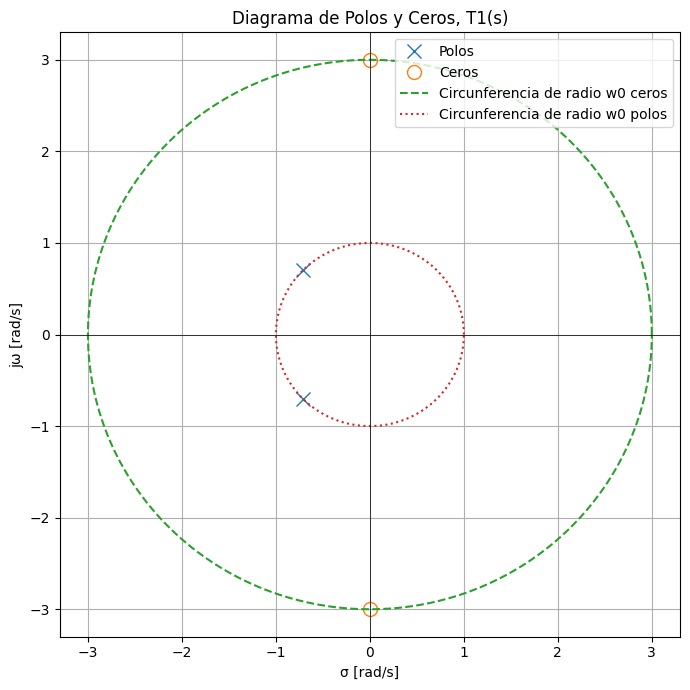

In [4]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

sos_a = [[1,0,9,1,np.sqrt(2),1]]  #(b2,b1,b0,a2,a1,a0)

z_a, p_a, k_a = sig.sos2zpk(sos_a)

# Parámetros de la circunferencia
w0_z_a = 3
w0_p_a = 1
x0, y0 = 0, 0  # centro 
theta = np.linspace(0, 2*np.pi, 500)

plt.figure(figsize=(7,7))
plt.plot(np.real(p_a), np.imag(p_a), 'x', markersize=10, label='Polos')
if len(z_a) > 0:
    plt.plot(np.real(z_a), np.imag(z_a), 'o', markersize=10, fillstyle='none', label='Ceros')
plt.plot(w0_z_a * np.cos(theta), w0_z_a * np.sin(theta), label='Circunferencia de radio w0 ceros', linestyle='--')
plt.plot(w0_p_a * np.cos(theta), w0_p_a * np.sin(theta), label='Circunferencia de radio w0 polos', linestyle=':')
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.title('Diagrama de Polos y Ceros, T1(s)')
plt.xlabel('σ [rad/s]')
plt.ylabel('jω [rad/s]')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

Se puede observar que los resultados obtenidos de forma analítica coinciden con el gráfico.

#### $T_2(s) = \frac{s^2 + \frac{1}{9}}{s^2 + s \frac{1}{5} + 1}$
En caso de esta función de transferencia se ve que se modifica la ubicación de los ceros ya que $\omega_{0z} = \frac{1}{3}$. De igual forma se mantiene el mismo $\psi_z$, ya que el coeficiente lineal es cero. En caso de los polos, se mantiene el mismo $\omega_0p$, por lo que los mismos se encuentran en la circunferencia radio $1$. Al despejar

### **Respuesta en Módulo y Fase**

Se procedió luego a diseñar los filtros determinados por las funciones transferencia $T(s)_1$, $T(s)_2$ y $T(s)_3$. 

In [5]:
from scipy import signal 

# Vector de frecuencias 
w = np.logspace(-1, 2, 1000)

In [ ]:
# T1(s) 

# Coeficientes
b, a = sig.zpk2tf(z_a, p_a, k_a)

# Respuesta en frecuencia
w, h = sig.freqs(b, a, w)
fase = np.unwrap(np.angle(h))

plt.figure(figsize=(12,5))

# Magnitud T1
plt.subplot(1,2,1)
mag_db = 20*np.log10(np.abs(h))
max_mag_db = np.max(mag_db)
plt.semilogx(w, mag_db - max_mag_db)
plt.title('T1(s) - Respuesta en Magnitud')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('|H(jω)| [dB]')
plt.grid(True, which='both', alpha=0.5)

# Fase T1
plt.subplot(1,2,2)
plt.semilogx(w, fase) 
plt.title('T1(s) - Respuesta en Fase')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('Fase [rad]') 
plt.grid(True, which='both', alpha=0.5)


In [ ]:
# T2(s) 

b, a = sig.zpk2tf(z_b, p_b, k_b)
w, h = sig.freqs(b, a, w)
fase = np.unwrap(np.angle(h))

plt.figure(figsize=(12,5))

# Magnitud T2
plt.subplot(1,2,1)
mag_db = 20*np.log10(np.abs(h))
max_mag_db = np.max(mag_db)
plt.semilogx(w, mag_db - max_mag_db)
plt.title('T2(s) - Respuesta en Magnitud ')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('|H(jω)| [dB]')
plt.grid(True, which='both', alpha=0.5)

# Fase T2
plt.subplot(1,2,2)
plt.semilogx(w, fase)
plt.title('T2(s) - Respuesta en Fase')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('Fase [rad]')
plt.grid(True, which='both', alpha=0.5)


In [ ]:
# T3(s)

b, a = sig.zpk2tf(z_c, p_c, k_c)
w, h = sig.freqs(b, a, w)
fase = np.unwrap(np.angle(h))

plt.figure(figsize=(12,5))

# Magnitud T3
plt.subplot(1,2,1)
mag_db = 20*np.log10(np.abs(h))
max_mag_db = np.max(mag_db)
plt.semilogx(w, mag_db - max_mag_db)
plt.title('T3(s) - Respuesta en Magnitud ')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('|H(jω)| [dB]')
plt.grid(True, which='both', alpha=0.5)

# Fase T3
plt.subplot(1,2,2)
plt.semilogx(w, fase)
plt.title('T3(s) - Respuesta en Fase')
plt.xlabel('Pulsación angular [rad/s]')
plt.ylabel('Fase [rad]')
plt.grid(True, which='both', alpha=0.5)

A partir de los gráficos obtenidos para las respuestas en módulo y fase de las diferentes funciones trasnferencia, que representan filtros analógicos pasivos, se realiza el siguiente análisis:

- T1(s)= Se observa una respuesta de Filtro Pasabajos, ya que hay una zona donde no hay atenuación en bajas frecuencias, seguida por la presencia de un "pozo" de atenuación infinita (gran disminución en dB), lo que indica un cero de transmisión, que se corresponde en un cero sobre el eje $j\omega$ en el diagrama de polos y ceros. A continuación también hay una zona de atenuación, mayor que la inicial, en un valor de $\approx -19dB$. En el gráfico de fase, se ve un salto abrupto en la misma frecuencia del pozo de atenuación en frecuencia.
  
- T2(s) = Este filtro se trata de un filtro Pasabanda. Se observa atenuación en las bajas frecuencias ($\approx -35dB$) como en las altas ($\approx -10dB$), presentando la banda de paso donde el gráfico indica 0dB. Además, al igual que el filtro anterior presenta un pozo de atenuación infinita, es decir un cero de transmisión, por lo que habrá una frecuencia en particular que será rechazada completamente. Esto representa un cero sobre el eje $j\omega$. 

- TS(3) = Por ultimo, se observa un filtro rechaza-banda. Permite el passo de bajas y altas frecuencias, ya que en estas áreas la ganancia es de 0dB, y presenta una banda de rechazo con pendientes de atenuación pronunciadas. Sin embargo y a diferencia de los filtros anteriores, la atenuación no es infinita sino que tiene un valor finito de $\approx = -17.5dB$. Indica que los ceros de la transferencia no están sobre el eje $j\omega$ sino que están amortiguados.  


No se hace especial énfasis en el análisis de la respuesta en fase por su interpretación física más compleja, pero cabe destacar que en ningún caso se obtiene una respuesta de fase lineal que sería lo mas deseable ya que se contaría con un retardo de grupo constante. Ésto último significa que todas las frecuencias tardan lo mismo en pasar por el filtro y la frecuencia de la señal no se deforma. 

Ésto último demuestra el denominado *trade-off* o relación de compromiso de los diseños analizados: se obtiene una gran selectividad en magnitud con pendientes de atenuación muy abruptas a costa de una respuesta en fase no lineal, que implicará una distorsión en la forma de la señal. 


## **Bonus**

## **Conclusiones**

## **Autoevaluación**